<a href="https://colab.research.google.com/github/OfRoses/Advanced-Regressive-Methods/blob/main/Regressive_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

from pathlib import Path
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data_dir = Path("/content/drive/MyDrive/studentpor/studentpor.csv")
print(data_dir)
data = pd.read_csv(r'/content/drive/MyDrive/studentpor/studentpor.csv')
data.head()

/content/drive/MyDrive/studentpor/studentpor.csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
df_data = pd.DataFrame(data)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

<ipython-input-14-ce23dd0efd27>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


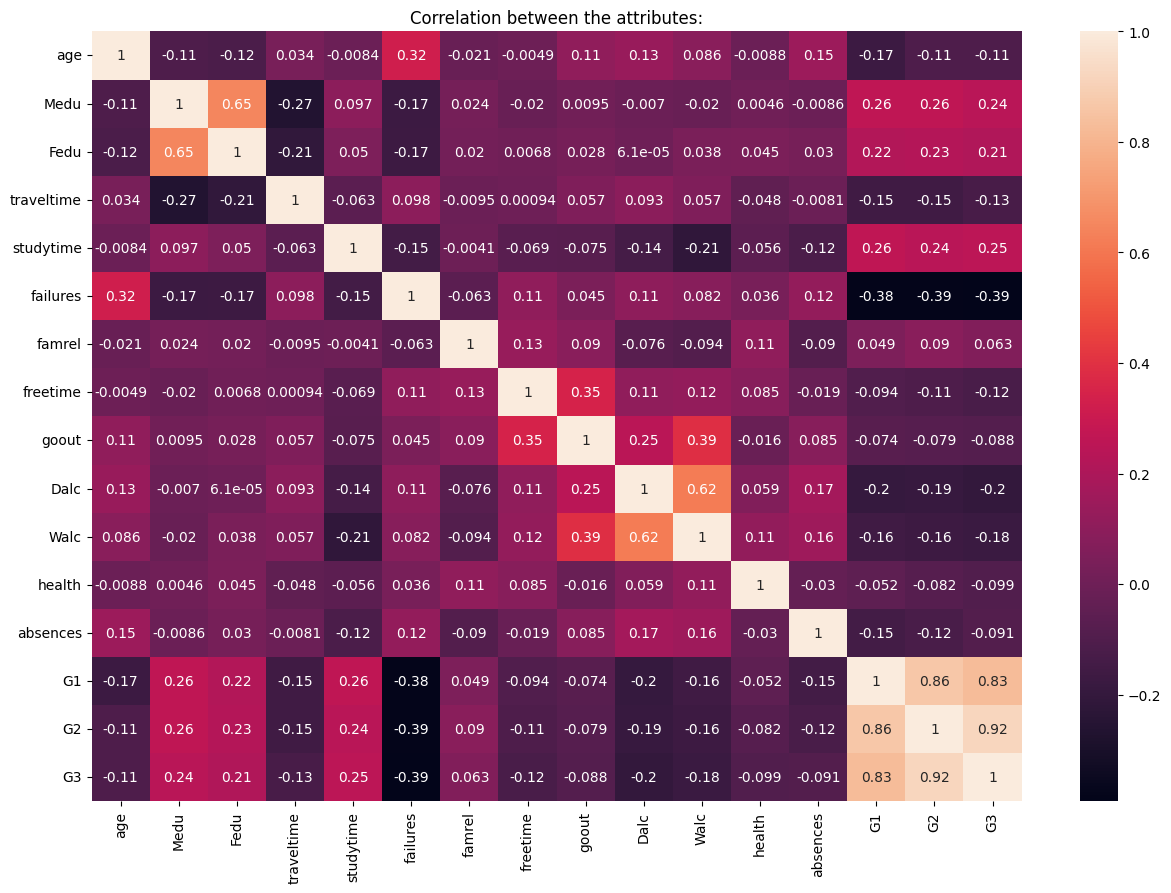

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
plt.title('Correlation between the attributes:')
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

In [ ]:
# 'G1,G2,G3' é a variável dependente
X = data.drop('G1', axis=1)
y = data['G1']
X = data.drop('G2', axis=1)
y = data['G2']
X = data.drop('G3', axis=1)
y = data['G3']

# Convertendo variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)

# Dividindo os dados em treino, teste e validação
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


models_params = {
    'KNR': {
        'model': KNeighborsRegressor(),
        'params': {
            'regressor__n_neighbors': [3, 5, 10],
            'regressor__weights': ['uniform', 'distance']
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'regressor__C': [0.1, 1, 10],
            'regressor__kernel': ['rbf', 'linear']
        }
    },
    'MLP': {
        'model': MLPRegressor(max_iter=1000),
        'params': {
            'regressor__hidden_layer_sizes': [(50,), (100,)],
            'regressor__activation': ['relu', 'tanh'],
            'regressor__learning_rate_init': [0.001, 0.01, 0.1]
        }
    },
    'RF': {
        'model': RandomForestRegressor(),
        'params': {
            'regressor__n_estimators': [10, 50, 100],
            'regressor__max_depth': [None, 10, 20, 30],
            'regressor__criterion': ['mse', 'mae'],
            'regressor__min_samples_split': [2, 5, 10],
            'regressor__min_samples_leaf': [1, 2, 4]
        }
    },
    'GB': {
        'model': GradientBoostingRegressor(),
        'params': {
            'regressor__n_estimators': [100, 200],
            'regressor__learning_rate': [0.01, 0.1],
            'regressor__max_depth': [3, 5, 10]
        }
    }
}


results = {model_name: {'RMSE': []} for model_name in models_params}


for model_name, mp in models_params.items():
    for _ in range(20):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', mp['model'])
        ])
        grid_search = GridSearchCV(pipeline, mp['params'], cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)


        y_pred = grid_search.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        results[model_name]['RMSE'].append(rmse)


for model_name in results:
    rmse_values = results[model_name]['RMSE']
    mean_rmse = np.mean(rmse_values)
    std_rmse = np.std(rmse_values)
    results[model_name]['Mean RMSE'] = mean_rmse
    results[model_name]['Std RMSE'] = std_rmse

    print(f"{model_name} - Média RMSE: {mean_rmse}, Desvio Padrão RMSE: {std_rmse}")

# Exibindo os resultados finais
print("\nResultados Finais:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Ensure that X_train, y_train, X_test, y_test are correctly defined here

models_params = {
    'KNR': {
        'model': KNeighborsRegressor(),
        'params': {
            'regressor__n_neighbors': [3, 5, 10],
            'regressor__weights': ['uniform', 'distance']
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'regressor__C': [0.1, 1, 10],
            'regressor__kernel': ['rbf', 'linear']
        }
    },
    'MLP': {
        'model': MLPRegressor(max_iter=1000),
        'params': {
            'regressor__hidden_layer_sizes': [(50,), (100,)],
            'regressor__activation': ['relu', 'tanh'],
            'regressor__learning_rate_init': [0.001, 0.01, 0.1]
        }
    },
    'RF': {
        'model': RandomForestRegressor(),
        'params': {
            'regressor__n_estimators': [10, 50, 100],
            'regressor__max_depth': [None, 10, 20, 30],
            #'regressor__criterion': ['mse', 'mae'],
            'regressor__min_samples_split': [2, 5, 10],
            'regressor__min_samples_leaf': [1, 2, 4]
        }
    },
    'GB': {
        'model': GradientBoostingRegressor(),
        'params': {
            'regressor__n_estimators': [100, 200],
            'regressor__learning_rate': [0.01, 0.1],
            'regressor__max_depth': [3, 5, 10],
            'regressor__min_samples_split': [2, 5, 10],
            'regressor__min_samples_leaf': [1, 2, 4]
        }
    }
}

# Estrutura para armazenar os resultados
results = {model_name: {'RMSE': []} for model_name in models_params}

# Loop para aplicar o GridSearch em cada modelo
for model_name, mp in models_params.items():
    for _ in range(20):  # Executando cada modelo 20 vezes
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', mp['model'])
        ])
        grid_search = GridSearchCV(pipeline, mp['params'], cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
        try:
            grid_search.fit(X_train, y_train)
        except Exception as e:
            print(f"Error occurred with model {model_name}: {e}")
            continue

        # Avaliando o modelo no conjunto de teste
        y_pred = grid_search.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        results[model_name]['RMSE'].append(rmse)

# Calculando média e desvio padrão para cada modelo
for model_name in results:
    rmse_values = results[model_name]['RMSE']
    mean_rmse = np.mean(rmse_values)
    std_rmse = np.std(rmse_values)
    results[model_name]['Mean RMSE'] = mean_rmse
    results[model_name]['Std RMSE'] = std_rmse

    print(f"{model_name} - Média RMSE: {mean_rmse}, Desvio Padrão RMSE: {std_rmse}")

# Exibindo os resultados finais
print("\nResultados Finais:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates